<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/ML_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#troubleshooting potential missing libraries
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [151]:
df=pd.read_csv('cancer.csv')
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [152]:
df.shape

(570, 7)

In [153]:
#1. split the data into features and target variable

#2. construct training and testing dataset (80% for training)

In [154]:
df_features=df.iloc[:,1:7]

df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [155]:
df_label=df.iloc[:,0]
df_label.head()



0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [156]:
#construct the training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.2,random_state=42)


In [157]:
len(x_train)

456

In [158]:
len(x_test)

114

In [159]:
df_model=DecisionTreeClassifier()
df_model.fit(x_train,y_train)



DecisionTreeClassifier()

In [160]:
#model prediction
pred_y=df_model.predict(x_test)

In [161]:
#model evaluation
# 1. calcculate the accuracy
accy=accuracy_score(y_test,pred_y)
accy



0.8947368421052632

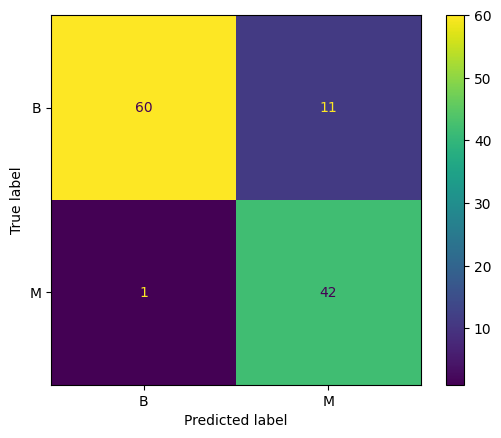

In [168]:
cm= confusion_matrix(y_test,pred_y,labels=df_model.classes_)
cmd=ConfusionMatrixDisplay(cm,display_labels=df_model.classes_)
cmd.plot()
plt.show()





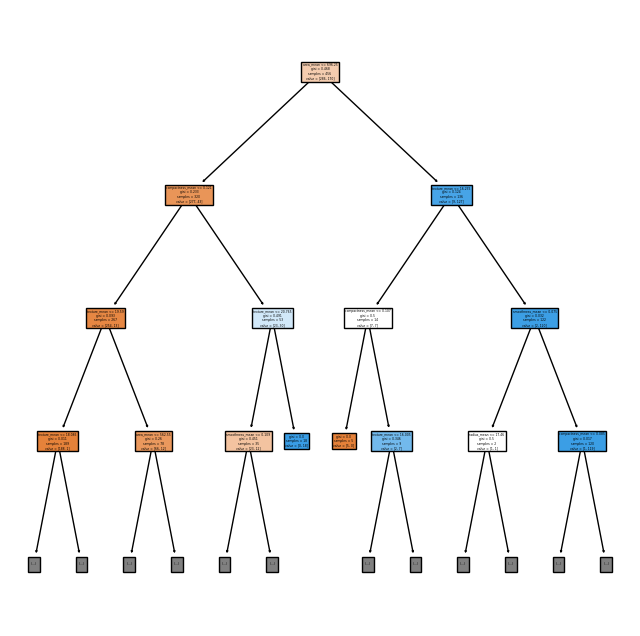

In [170]:
#visualize the decision tree
plt.figure(figsize=(8,8))
tree.plot_tree(df_model, feature_names=list(x_train), filled=True,max_depth=3)
plt.show()